# Mesure de la radioactivité avec le capteur OpenRadiation
Utilisation du capteur OpenRadiation et de l'API OpenRadiation pour la mesure de la dose efficace par jour et en µSv/heure. J'utilise mon userId et le tag "Paris" pour la démonstration. La clé de l'API est celle des tests (https://github.com/openradiation/openradiation-api) :

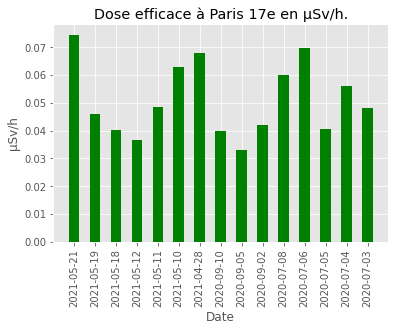

In [2]:
import requests
import json
from datetime import datetime
import matplotlib.pyplot as plt

# Interrogation de l'API d'OpenRadiation sur mon compteur
url = "https://request.openradiation.net/measurements"
params = dict(
    apiKey='28c3aece38504d8f6d67291bcb8ebe9a',
    userId='rbmk17',
    tag="Paris",
    maxNumber="15"
)
# On récupère les données json de l'API
resp = requests.get(url=url, params=params)
data = resp.json()
# On créé le graphique
plt.style.use('ggplot')
plt.title('Dose efficace à Paris 17e en µSv/h.', color="black")

for i in data["data"]:
        date = datetime.strptime(i["startTime"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime('%Y-%m-%d')
        x = date
        y = i["value"]
        plt.bar(x,y, color="green", width=0.5)

plt.ylabel('µSv/h')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.show()
plt.close()

Echelle de valeurs : 

- Un voyage Paris-New York (aller et retour) en avion à 11000 m. : 32 µSv/h (en moyenne)
- Une radio des poumons : 100 µSv/h
- Une radio des dents (pano) : 150 µSv/h
- Dose maximale extérieure lors de l'accident de Three Mile Island (1979) : 1000 µSv/h
- Dose extérieure en 1 heure en 2010 à Pripiat (Ukraine, 3km de la centrale de Tchernobyl) : 6000 µSv/h
- Dose extérieure en 10 minutes entre le 26 avril et le 9 mai 1986 face au réacteur n°4 de la centrale de Tchernobyl après l'explosition : 50 000 000 µSv/h

Liens utiles :

- Les données brutes de mon capteur : https://request.openradiation.net/measurements?apiKey=bde8ebc61cb089b8cc997dd7a0d0a434&userId=rbmk17
- Le site Open Radiation : https://www.openradiation.org
- Pourquoi faire des mesures : https://www.openradiation.org/fr/faire-une-mesure
- Les données : https://www.openradiation.org/fr/les-donnees et l'API : https://www.openradiation.org/fr/developpeurs
- Les mesures : https://www.openradiation.org/fr/comment-fait-une-mesure
- Le Sievert : https://fr.wikipedia.org/wiki/Sievert